In [1]:
# Data source
source='https://data.imf.org/?sk=F8032E80-B36C-43B1-AC26-493C5B1CD33B'
print('Accessed 07/07/2021 from IMF website -> '+source)

Accessed 07/07/2021 from IMF website -> https://data.imf.org/?sk=F8032E80-B36C-43B1-AC26-493C5B1CD33B


In [2]:
# Reading the data from my github. Downloaded from
import pandas as pd

url='https://github.com/imedkrisna/BIES-figure67/raw/main/FD%20Index%20Database%20(Excel).xlsx'
df=pd.read_excel(url)
df.head()

,ifs,code,country,imf_region,imf_income,year,FD,FI,FM,FID,FIA,FIE,FMD,FMA,FME
0,314,ABW,Aruba,Western Hemisphere,EM,2018,0.295090,0.571631,0.007356,0.272385,0.695166,0.641013,0.019856,0.0,0.0
1,314,ABW,Aruba,Western Hemisphere,EM,2017,0.297746,0.577792,0.006406,0.272385,0.709758,0.641990,0.017292,0.0,0.0
2,314,ABW,Aruba,Western Hemisphere,EM,2016,0.302239,0.586555,0.006459,0.280556,0.724822,0.640035,0.017434,0.0,0.0
3,314,ABW,Aruba,Western Hemisphere,EM,2015,0.297722,0.577775,0.006375,0.270970,0.713883,0.638080,0.017210,0.0,0.0
4,314,ABW,Aruba,Western Hemisphere,EM,2014,0.298137,0.578489,0.006477,0.265957,0.716189,0.644303,0.017483,0.0,0.0


In [3]:
# Data for figure 6
FD=df.query('code=="IDN" or code=="USA" or code=="CHN" or code=="SGP" or code=="MYS" or code=="THA" or code=="VNM"')

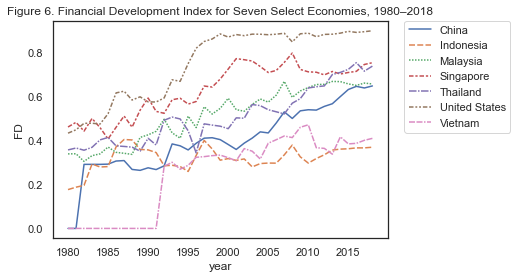

In [4]:
# Plotting figure 6
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="white")

# Plot the responses for different events and regions
sns.lineplot(x="year", y="FD",
             hue="country", style="country",
             data=FD)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Figure 6. Financial Development Index for Seven Select Economies, 1980–2018')
plt.savefig('fig6.png')

In [5]:
# Creating dataset for figure 7
FDID=df.query('code=="IDN"')
a=FDID.melt(id_vars=['code','year'], value_vars=['FID'])
b=FDID.melt(id_vars=['code','year'], value_vars=['FIA'])
c=FDID.melt(id_vars=['code','year'], value_vars=['FIE'])
d=FDID.melt(id_vars=['code','year'], value_vars=['FMD'])
e=FDID.melt(id_vars=['code','year'], value_vars=['FMA'])
f=FDID.melt(id_vars=['code','year'], value_vars=['FME'])
FDII=pd.concat([a,b,c])
FDMM=pd.concat([d,e,f])

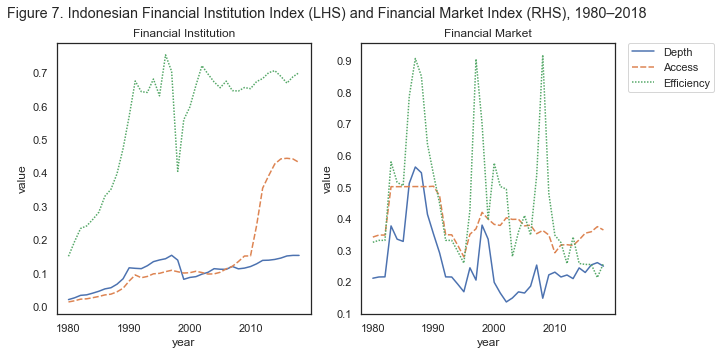

In [6]:
# creating figure 7 in a subplot
fig, axes = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('Figure 7. Indonesian Financial Institution Index (LHS) and Financial Market Index (RHS), 1980–2018')
sns.lineplot(ax=axes[0],x="year", y="value",
             hue="variable", style="variable",
             data=FDII,legend=False)
axes[0].set_title('Financial Institution')

# Charmander
sns.lineplot(ax=axes[1],x="year", y="value",
             hue="variable", style="variable",
             data=FDMM)
axes[1].set_title('Financial Market')
plt.legend(labels=['Depth','Access','Efficiency'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('fig7.png')

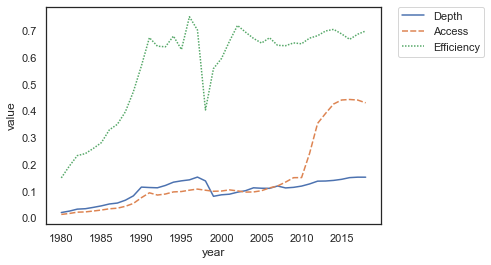

In [7]:
# figure 7 left
sns.lineplot(x="year", y="value",
             hue="variable", style="variable",
             data=FDII)
plt.legend(labels=['Depth','Access','Efficiency'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

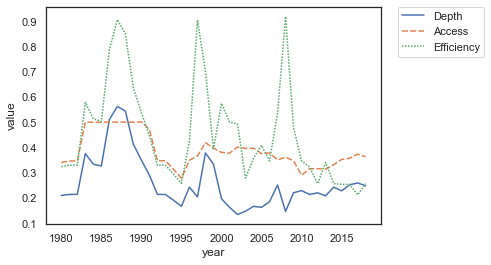

In [8]:
#figure 7 right
sns.lineplot(x="year", y="value",
             hue="variable", style="variable",
             data=FDMM)
plt.legend(labels=['Depth','Access','Efficiency'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)